<a href="https://colab.research.google.com/github/Alinananaaa/2025_programming/blob/main/0327_%E4%BD%9C%E6%A5%AD2_%E8%A6%96%E8%A6%BA%E5%8C%96%E6%96%87%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

我的碩論文本：All the Light We Cannot See
我想分析裡面的語言內容：
以序章為例（文本內p.5-p.16)
1. 角色語意分布圖（PCA + BERT）
2. 主題分群圖（KMeans 分群）
3. 角色與主題群組對照熱圖（角色與語意主題的對應關係）

安裝套件：
sentence-transformers	用 BERT 模型把文字轉換成語意向量	分析語意、降維、分群

scikit-learn	機器學習工具包，包括 PCA、KMeans 等	降維、分群、預處理

matplotlib	畫圖工具	折線圖、散點圖、熱圖等

pandas	表格處理工具	整理數據、建立 DataFrame

seaborn	圖表（建構在 matplotlib 上）

In [1]:
!pip install -q sentence-transformers scikit-learn matplotlib pandas seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.6 MB/s eta 0:00:00


使用 BERT 建立語意圖

In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
定義小說段落資料
"title"：小節標題（The Girl、The Boy）
"text"：這段文字的內容
"character"：主要敘述視角的角色（Marie-Laure、Werner、Narrator）
把各欄資料抽出來
texts = [s["text"] for s in sections]
titles = [s["title"] for s in sections]
characters = [s["character"] for s in sections]

In [3]:
sections = [
    {"title": "The Girl", "text": "In a corner of the city, inside a tall, narrow house...", "character": "Marie-Laure"},
    {"title": "The Boy", "text": "Five streets to the north, a white-haired German private named Werner...", "character": "Werner"},
    {"title": "Saint-Malo", "text": "Up and down the lanes, the last unevacuated townspeople wake...", "character": "Narrator"},
    {"title": "Number 4 rue Vauborel", "text": "Marie-Laure LeBlanc stands alone in her bedroom...", "character": "Marie-Laure"},
    {"title": "Cellar", "text": "Beneath the lobby of the Hotel of Bees, a corsair’s cellar...", "character": "Werner"},
    {"title": "Bombs Away", "text": "Seventeen eighteen nineteen twenty. Now the sea races beneath...", "character": "Narrator"},
]
texts = [s["text"] for s in sections]
titles = [s["title"] for s in sections]
characters = [s["character"] for s in sections]


1. 用 BERT 產生語意向量
2. 資料標準化
3. PCA 降維
4. 整理成 DataFrame

In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts)
X_scaled = StandardScaler().fit_transform(embeddings)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

df = pd.DataFrame({
    "Title": titles,
    "Character": characters,
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1]
})
df.head()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,Title,Character,PCA1,PCA2
0,The Girl,Marie-Laure,-3.727145,5.688474
1,The Boy,Werner,5.254393,16.913639
2,Saint-Malo,Narrator,5.815801,-1.019945
3,Number 4 rue Vauborel,Marie-Laure,-12.919439,-7.537358
4,Cellar,Werner,-9.415442,-2.107634


每個點 = 小說中一段敘述（像是 The Girl, Cellar）

點的位置（PCA1, PCA2）= 代表這段話的「語意位置」
> BERT 向量 + PCA 降維

顏色 = 這段話是哪位角色的視角或敘述風格
> Marie-Laure（紅色）、Werner（藍色）

語意空間中「視覺化文字」的分布結論：
如果 Marie-Laure 的段落都集中在圖的一側，而 Werner 的在另一邊
→ 說明他們的語言風格明顯不同

如果 Narrator 的點在兩群之間
→ 可能代表他用「折衷」或「中立」的敘述語氣來串聯兩者


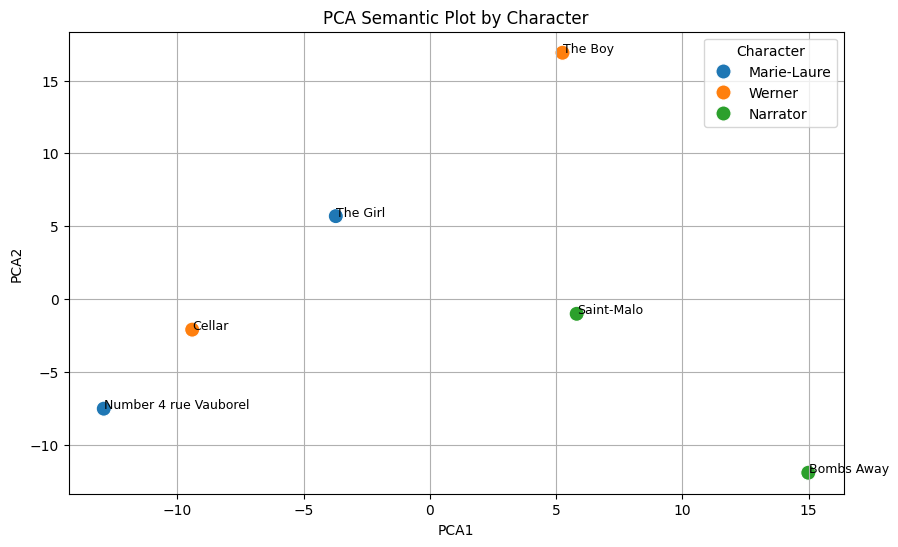

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Character", s=120)
for _, row in df.iterrows():
    plt.text(row["PCA1"]+0.02, row["PCA2"], row["Title"], fontsize=9)
plt.title("PCA Semantic Plot by Character")
plt.grid(True)
plt.show()


PCA Plot with KMeans Clustering

每個點還是代表一段小說敘述（語意經過 BERT + PCA）
這張圖把每個點自動**分群（Clustering）**
顏色代表 KMeans 算法自動分出的語意主題群組

同一顏色 → 這些段落在語意上很像，可能談的是相同的主題、事件或角色情緒
不同顏色 → 主題、風格或角色觀點不同

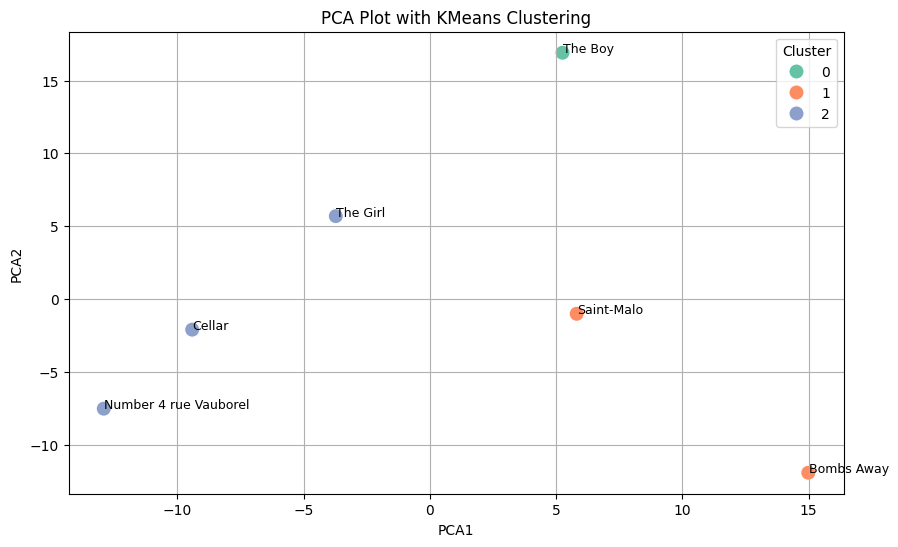

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(embeddings)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=120)
for _, row in df.iterrows():
    plt.text(row["PCA1"]+0.02, row["PCA2"], row["Title"], fontsize=9)
plt.title("PCA Plot with KMeans Clustering")
plt.grid(True)
plt.show()


這張圖是一張「交叉表（crosstab）」的熱圖（heatmap），橫軸是 語意群組（Cluster 0, 1, 2），縱軸是 角色（Marie-Laure, Werner, Narrator）。

每個格子表示：該角色在該群組中出現了幾段


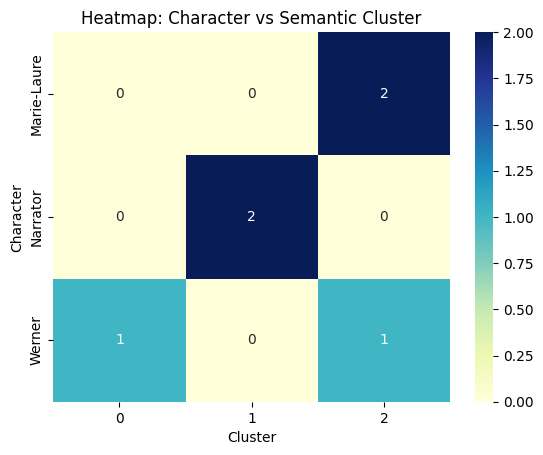

In [7]:
cross_tab = pd.crosstab(df["Character"], df["Cluster"])
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap: Character vs Semantic Cluster")
plt.xlabel("Cluster")
plt.ylabel("Character")
plt.show()


這張柱狀圖展示了每個語意群組（Cluster 0、1、2）中出現最頻繁的前五個單字，讓你清楚看出：

Cluster 0：出現較多與感官或環境有關的詞，如模型、房子、街道等

Cluster 1：偏向軍事與動作場景，可能會看到 like、sea、chair 等反映外部事件

Cluster 2：與城市氛圍或敘述串聯有關，可能出現 narrator、wake、down 等詞彙

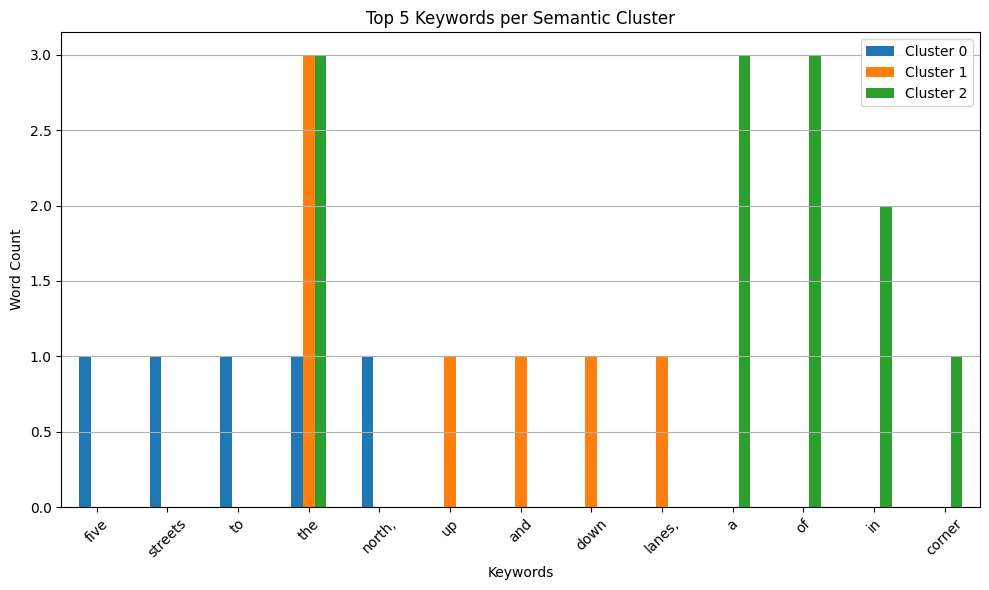

In [8]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# 先確認你有這個 DataFrame：df（包含 "Cluster"）與 sections（原始段落）

# 為每個群組統計單字
cluster_keywords = {}

for cluster_id in sorted(df["Cluster"].unique()):
    # 抓出屬於這個群組的段落文字
    texts_in_cluster = [sections[i]["text"] for i in df[df["Cluster"] == cluster_id].index]

    # 簡單斷詞（全部小寫、依空白切分）
    words = " ".join(texts_in_cluster).lower().split()

    # 統計詞頻
    word_counts = Counter(words)

    # 取出前5個常見單字
    common_words = word_counts.most_common(5)

    # 存入字典中
    cluster_keywords[f"Cluster {cluster_id}"] = dict(common_words)

# 轉換為 DataFrame（每列是單字，每欄是 Cluster）
cluster_df = pd.DataFrame(cluster_keywords).fillna(0)

# 畫出柱狀圖
cluster_df.plot(kind="bar", figsize=(10, 6))
plt.title("Top 5 Keywords per Semantic Cluster")
plt.ylabel("Word Count")
plt.xlabel("Keywords")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
